In [1]:
# gradient_shap.ipynb
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

In [2]:
import torch
from vit import get_vit_model, get_vit_model_with_hooks
from data.data import get_imagenette_dataloader
from utils.shap_utils import compute_shap_values, visualize_shap
from utils.vit_utils import visualize_attention_map

%load_ext autoreload
%autoreload 2

In [3]:
model = get_vit_model(model_name='vit_base_patch16_224', pretrained=True, num_classes=10)

In [7]:
dataloader = get_imagenette_dataloader(batch_size=10, img_size=224)
images, labels = next(iter(dataloader))
device = next(model.parameters()).device
images = images.to(device)

img_idx = 0

/home/kaiwen/Desktop/alan/fast_shapley/gradient_shap
download complete


## Generate Shapley Values

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SHAP value range before normalization: min=0.0002487757115522428, max=0.0031777050324162687
Normalized SHAP value range: min=0.0, max=1.0


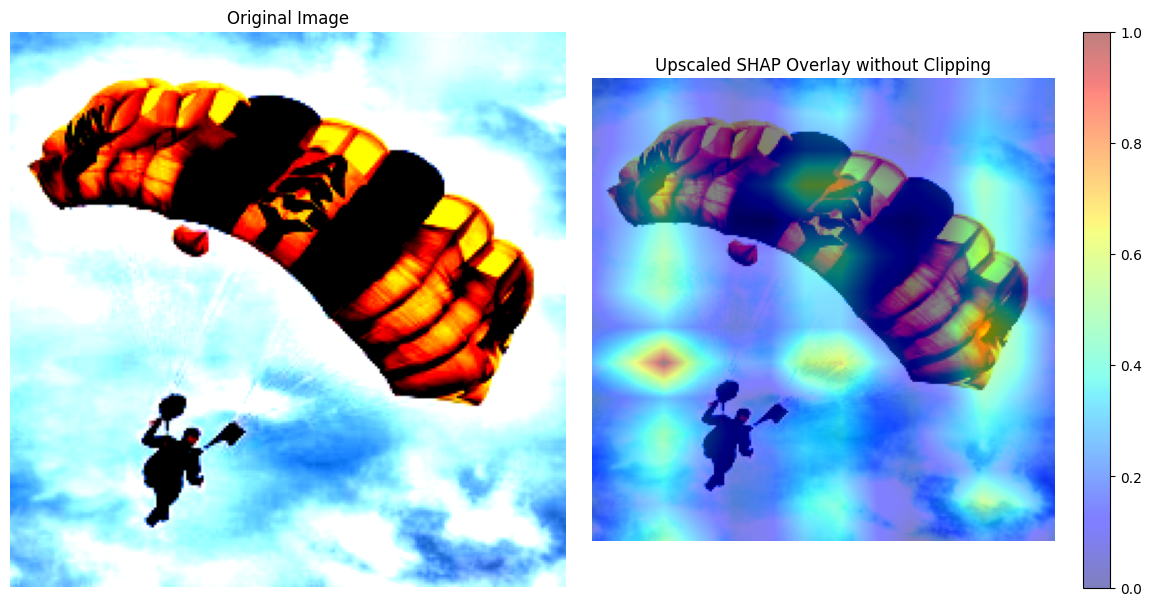

In [5]:
shap_values = compute_shap_values(model, images)
original_image = images[img_idx].cpu().numpy().transpose((1, 2, 0))
visualize_shap(shap_values, original_image, patch_size=16)

## Create Attention Maps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


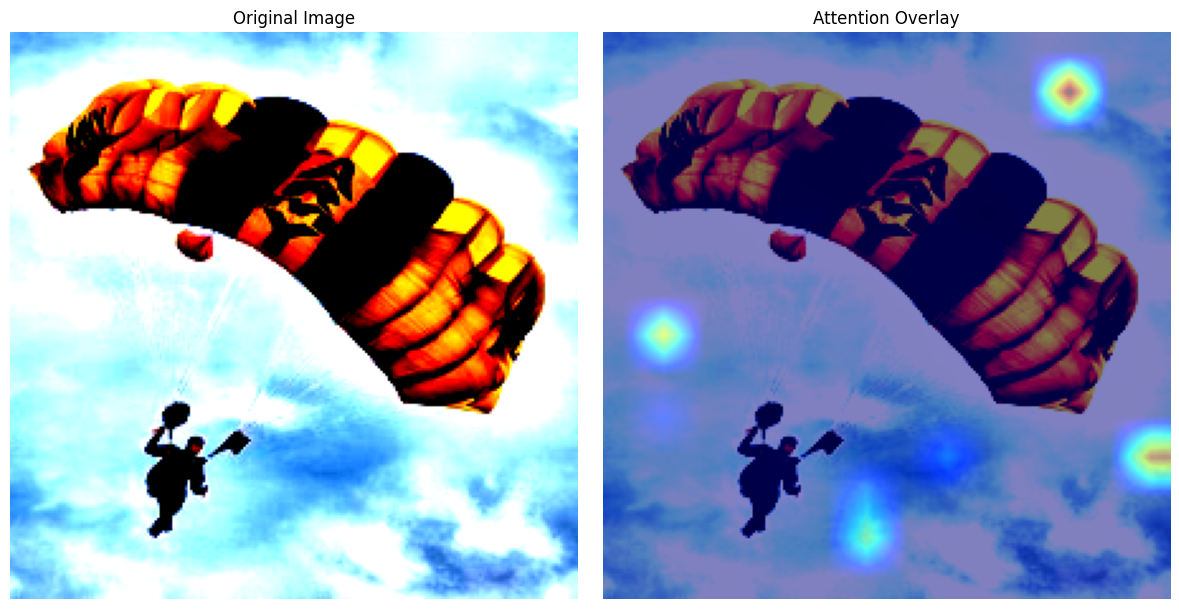

In [6]:
model_hook, attention_maps = get_vit_model_with_hooks(model_name='vit_base_patch16_224', pretrained=True, num_classes=10)

with torch.no_grad():
    _ = model_hook(images)

visualize_attention_map(images[img_idx], attention_maps) # let's compare attention map with shapley vis